In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
ride_file="./raw_data/ride_data.csv"
city_file="./raw_data/city_data.csv"

In [102]:
ride_df = pd.read_csv(ride_file)
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [103]:
city_df = pd.read_csv(city_file)
city_df.count()
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [104]:
#Average Fare ($) Per City
avg_fare = pd.DataFrame(ride_df.groupby(["city"])["fare"].mean())
avg_fare.reset_index(inplace=True)
avg_fare.head()

,city,fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [105]:
#Total Number of Rides Per City
fare_cnt = pd.DataFrame(ride_df.groupby(["city"])["fare"].count())
fare_cnt.reset_index(inplace=True)
fare_cnt.head()

,city,fare
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [106]:
#Total Number of Drivers Per City
dr_city = pd.DataFrame(city_df.groupby("city")["driver_count"].sum())
dr_city.reset_index(inplace=True)
dr_city.head()

,city,driver_count
0,Alvarezhaven,21
1,Alyssaberg,67
2,Anitamouth,16
3,Antoniomouth,21
4,Aprilchester,49


In [107]:
#City Type (Urban, Suburban, Rural)
city_type = pd.DataFrame(city_df.groupby("type")["city"].count())
city_type.reset_index(inplace=True)
city_type.head()

,type,city
0,Rural,18
1,Suburban,42
2,Urban,66


In [108]:
city_ride = pd.merge(ride_df, city_df, how="outer", on="city")
city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [109]:
#% of Total Fares by City Type
fares_city_type = pd.DataFrame(city_ride.groupby("type")["fare"].sum())
fares_city_type.reset_index(inplace=True)
total_fares_city_type = fares_city_type["fare"].sum()
fares_city_type["pct"] = (fares_city_type["fare"] / total_fares_city_type) * 100
fares_city_type.head()

,type,fare,pct
0,Rural,4255.09,6.579786
1,Suburban,20335.69,31.445750
2,Urban,40078.34,61.974463


In [110]:
def pie_chart(pie_labels, pie_values, chart_title):
    colors = ["gold", "lightskyblue", "lightcoral"]
    explode = (0,0,0.05)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(chart_title)
    ax.pie(pie_values, explode=explode,labels=pie_labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=90)
    ax.axis("equal")
    plt.show()

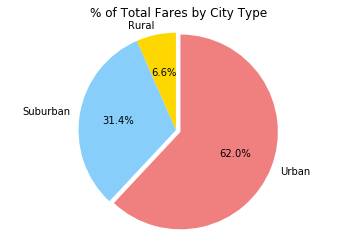

In [111]:
pie_labels = fares_city_type["type"]
pie_values = fares_city_type["pct"]
pie_chart(pie_labels, pie_values,"% of Total Fares by City Type")

In [112]:
#% of Total Rides by City Type
riders_city_type = pd.DataFrame(city_ride.groupby("type")["ride_id"].count())
riders_city_type.reset_index(inplace=True)
riders_city_type.rename(columns={"ride_id":"ride_cnt"},inplace=True)
total_riders_city_type = riders_city_type["ride_cnt"].sum()
riders_city_type["pct"] = (riders_city_type["ride_cnt"] / total_riders_city_type) * 100
riders_city_type.head()

,type,ride_cnt,pct
0,Rural,125,5.193187
1,Suburban,657,27.295388
2,Urban,1625,67.511425


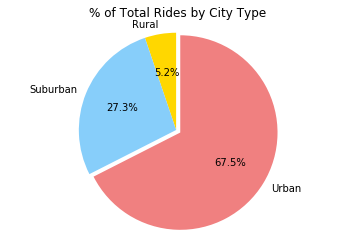

In [113]:
pie_labels = riders_city_type["type"]
pie_values = riders_city_type["pct"]
pie_chart(pie_labels, pie_values,"% of Total Rides by City Type")

In [114]:
#% of Total Drivers by City Type
dr_city_type = pd.DataFrame(city_df.groupby("type")["driver_count"].sum())
dr_city_type.reset_index(inplace=True)
total_dr_city_type = dr_city_type["driver_count"].sum()
dr_city_type["pct"] = (dr_city_type["driver_count"]/ total_dr_city_type) * 100
dr_city_type.head()

,type,driver_count,pct
0,Rural,104,3.105405
1,Suburban,638,19.050463
2,Urban,2607,77.844133


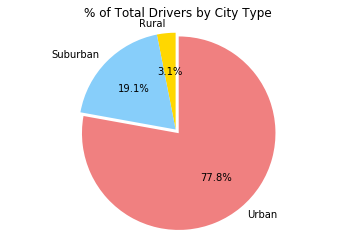

In [115]:
pie_labels = dr_city_type["type"]
pie_values = dr_city_type["pct"]
pie_chart(pie_labels, pie_values,"% of Total Drivers by City Type")